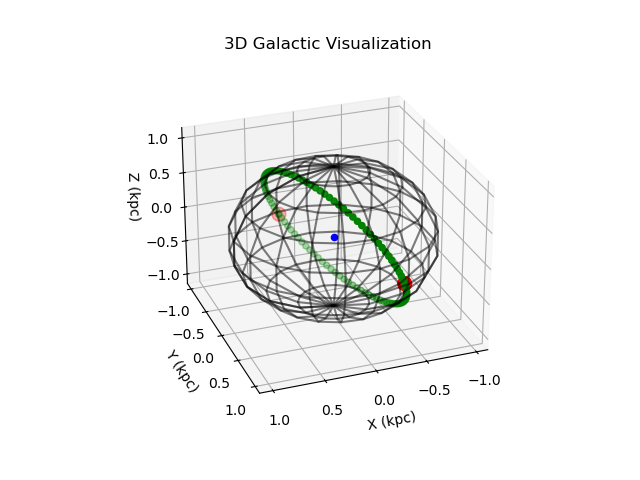

In [29]:


import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


import utils


N_side = 16  # Choose your resolution
pixel_id = 42  # Example pixel index

# Get the boundaries of the pixel
boundaries = hp.boundaries(N_side, pixel_id, step=1)
theta, phi = hp.vec2ang(np.transpose(boundaries))

# Convert to degrees for plotting
theta_deg = np.degrees(theta)
phi_deg = np.degrees(phi)

# Plot
# plt.figure()
hp.visufunc.projscatter(theta, phi, lonlat=False, c='red')  # Plot edges
hp.visufunc.projtext(np.mean(theta), np.mean(phi), str(pixel_id), lonlat=False, color='blue')  # Center
plt.show()


In [2]:
reddening_distance_slices = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

In [3]:
def make_position_vector_from_spherical(l,b,r):
    x = r * np.cos(b) * np.cos(l)
    y = r * np.cos(b) * np.sin(l)
    z = r * np.sin(b)
    return np.array([x,y,z])



In [4]:
#### check that the ray is not in the plane defined by any of the healpix edges


In [5]:
class class_isrf():
    def __init__(self):
        

SyntaxError: incomplete input (1204857459.py, line 3)

In [6]:
isrf_point_l = 0
isrf_point_b = 0
isrf_point_r = 0

star_l = 1
star_b = 1
star_r = 1


In [7]:


star_pos = make_position_vector_from_spherical(star_l,star_b,star_r)
isrf_pos = make_position_vector_from_spherical(isrf_point_l,isrf_point_b,isrf_point_r)

direction = isrf_pos - star_pos
direction_abs = np.dot(direction,direction)**0.5
star_dot_direction = np.dot(star_pos,direction)


In [8]:
def ray_linear_parameterization(star_pos,direction, t):
    return star_pos + t*direction


def p(star_pos,direction, t):
    x0,y0,z0 = star_pos
    a,b,c = direction
    p = ((x0 + t*a)**2 + (y0 + t*b)**2 + (z0 + t*c)**2)**0.5  
    return p

def find_crossing_positions(star_r,star_dot_direction,direction_abs,d):
    a = direction_abs**2
    b = 2*star_dot_direction
    c = star_r**2-d**2
    t1 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
    t2 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
    return t1,t2




#x = (-b +- (b^2-4ac)^0.5)/2a

In [9]:
find_crossing_positions(star_r,star_dot_direction,direction_abs,0.5)

(1.5, 0.5)

In [10]:
# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (-77.016, -12.033, 1),   # Center of the galaxy
    (110.43, -7.78, 1) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([utils.galactic_to_cartesian(*coord) for coord in coordinates])

In [30]:
center = np.array([0,0,0])
p1 = points[0]
p2 = points[1]

### Calculate the radius of the center of the circle
r =  np.linalg.norm(p1 - center)
### Calculate the normal vector of the plane defined by the circle
n = np.cross(p1 - center,p2 - center)
### Normalize the normal vector
n0 = n/np.linalg.norm(n)
### Calculate the other perpendicular vectors
q1 = p1
q2 = center + np.cross(n0,p1 - center)


def parameterize_circle(center, q1,q2,theta):
    """
    Given 3 points in space, on a circle center and 2 points on the rim of the circle, return the cartesian coordinates
    of a point on the circle parameterizerd by an angle theta. Theta is 0 at q1.
   
    input:
        center: np.array([x,y,z]) center of the circle
        q1: np.array([x,y,z]) point on the circle
        q2: np.array([x,y,z]) point on the circle
        theta: angle in radians

    output:

    """
    x = center[0] + np.cos(theta) *(q1[0] - center[0]) + np.sin(theta)*(q2[0] - center[0])
    y = center[1] + np.cos(theta) *(q1[1] - center[1]) + np.sin(theta)*(q2[1] - center[1])
    z = center[2] + np.cos(theta) *(q1[2] - center[2]) + np.sin(theta)*(q2[2] - center[2])
    return np.array([x,y,z])


In [12]:
r

0.9999999999999999

In [13]:
theta = np.linspace(0,2*np.pi,100)
circle = parameterize_circle(center,q1,q2,theta)

In [14]:
q1[0]-center[0]

0.21974223457327974

In [15]:
q2[0]-center[0]


-0.3905214727359677

In [16]:
%matplotlib widget
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import utils

Text(0.5, 0.92, '3D Galactic Visualization')

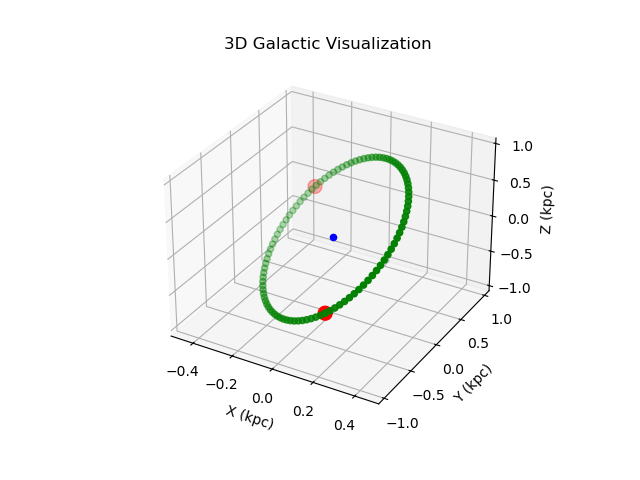

In [17]:
# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([p1[0], p2[0]],[p1[1], p2[1]], [p1[2],p2[2]], color='r', s=100)
ax.scatter(center[0],center[1],center[2], color='b')
ax.scatter(circle[0],circle[1],circle[2], color='g')
# ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# # Draw lines between points
# for i in range(len(points)-1):
#     ax.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color='blue')

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Galactic Visualization')

In [18]:

# Add spherical shell at radius 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=0.5)